In [1]:
import numpy as np
import pandas as pd
import vector
import os
import awkward as ak
vector.register_awkward()

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# mplhep for CMS-style plots
import mplhep as hep
import hist
from coffea.hist.plot import clopper_pearson_interval

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 16})

/Users/billyli/miniforge_x86_new/envs/hh4b/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [3]:
# set up directory to save plots
plot_dir = "../../../plots/MatchingStudy/23Aug18/"
_ = os.system(f"mkdir -p {plot_dir}")

In [4]:
def make_vector(events: pd.DataFrame, obj: str):
    """Create a ``vector`` object from the columns of the dataframe"""
    mstring = "Msd" if obj == "ak8FatJet" else "Mass"

    return vector.array(
        {
            "pt": events[f"{obj}Pt"],
            "phi": events[f"{obj}Phi"],
            "eta": events[f"{obj}Eta"],
            "M": events[f"{obj}{mstring}"],
        }
    )

In [5]:
# match resolved jets to Higgs
# get events and jets
events = pd.read_parquet(
    "../../../parquet/out_0.parquet"
    # "/eos/uscms/store/user/cmantill/bbbb/matching/Aug8/2022/GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG/parquet"
)
jets = make_vector(events, "ak4Jet")
gen_higgs = make_vector(events, "GenHiggs")


# get fjs matched to higgs
h1m2ak4 = (events['ak4JetHiggsMatchIndex'].to_numpy()==0).sum(axis=1)==2
h2m2ak4 = (events['ak4JetHiggsMatchIndex'].to_numpy()==1).sum(axis=1)==2
event_h1 = events[h1m2ak4]
event_h2 = events[h2m2ak4]

jet_mwh1_idx = event_h1['ak4JetHiggsMatchIndex']==0
jet_mwh2_idx = event_h2['ak4JetHiggsMatchIndex']==1

jet_mwh1 = jets[h1m2ak4][jet_mwh1_idx]
jet_mwh2 = jets[h2m2ak4][jet_mwh2_idx]

# get higgs that are matched to js
h1_mwj = gen_higgs[h1m2ak4][:,0]
h2_mwj = gen_higgs[h2m2ak4][:,1]

(array([ 50., 410., 714., 491., 580., 331., 136.,  72.,  19.,   7.]),
 array([ 24.1875 ,  94.96875, 165.75   , 236.53125, 307.3125 , 378.09375,
        448.875  , 519.65625, 590.4375 , 661.21875, 732.     ]),
 <BarContainer object of 10 artists>)

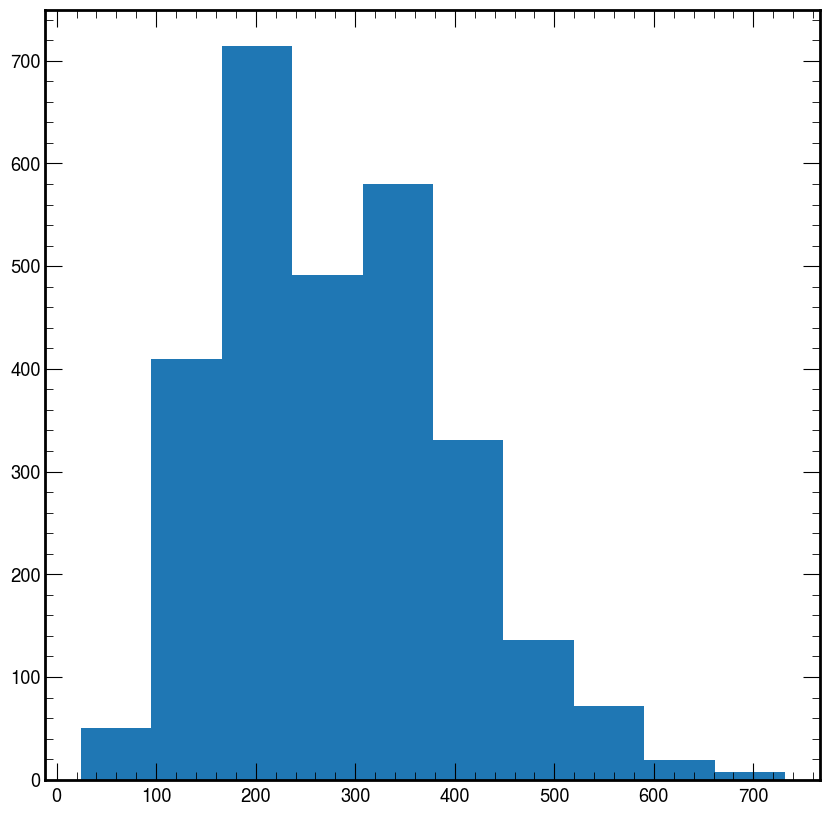

In [6]:
plt.hist(h1_mwj.pt)

In [14]:
# match resolved jets to Higgs
# get events and jets
events = pd.read_parquet(
    "../../../parquet/out_0.parquet"
    # "/eos/uscms/store/user/cmantill/bbbb/matching/Aug8/2022/GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG/parquet"
)
fjs = make_vector(events, "ak8FatJet")
gen_higgs = make_vector(events, "GenHiggs")


# get fjs matched to higgs
h1m1ak8 = (events['ak8FatJetHiggsMatchIndex'].to_numpy()==0).sum(axis=1)==1
h2m1ak8 = (events['ak8FatJetHiggsMatchIndex'].to_numpy()==1).sum(axis=1)==1
event_h1 = events[h1m1ak8]
event_h2 = events[h2m1ak8]

fj_mwh1_idx = event_h1['ak8FatJetHiggsMatchIndex']==0
fj_mwh2_idx = event_h2['ak8FatJetHiggsMatchIndex']==1

fj_mwh1 = fjs[h1m1ak8][fj_mwh1_idx]
fj_mwh2 = fjs[h2m1ak8][fj_mwh2_idx]

# get higgs that are matched to js
h1_mwfj = gen_higgs[h1m2ak8][:,0]
h2_mwfj = gen_higgs[h2m2ak8][:,1]

(array([1.0240e+03, 1.4159e+04, 6.7600e+03, 1.1680e+03, 2.3100e+02,
        7.8000e+01, 1.6000e+01, 7.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([  26.4375 ,  146.99375,  267.55   ,  388.10625,  508.6625 ,
         629.21875,  749.775  ,  870.33125,  990.8875 , 1111.44375,
        1232.     ]),
 <BarContainer object of 10 artists>)

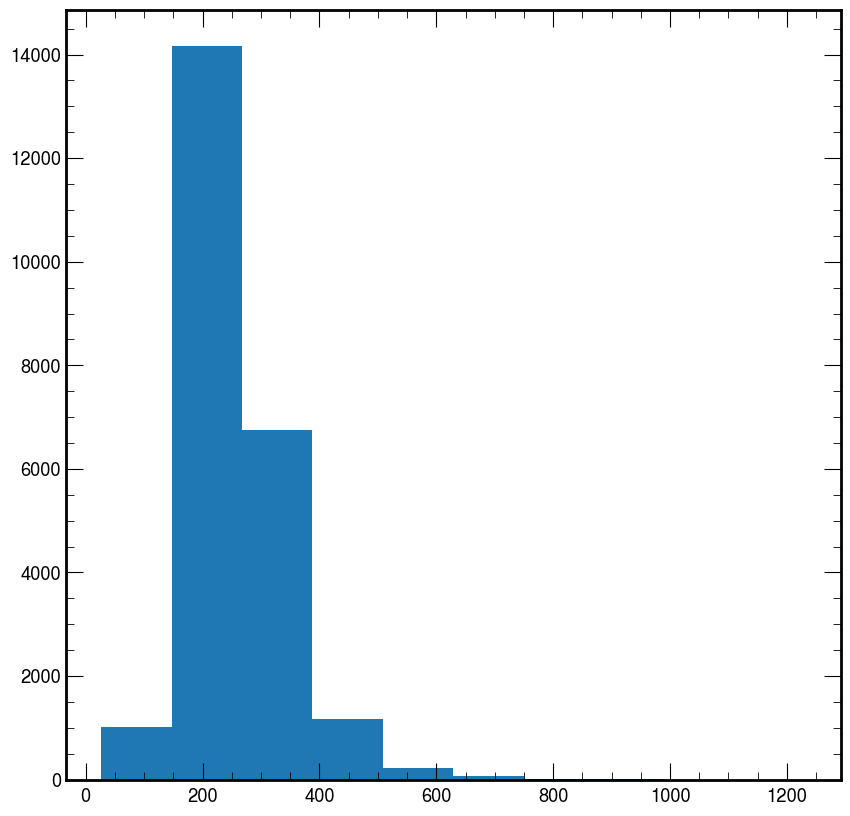

In [15]:
plt.hist(h1_mwfj.pt)

                 ┌───────────────────────────────────────────────────────────┐
[-inf,    0) 0   │                                                           │
[   0,  100) 60  │████▍                                                      │
[ 100,  200) 748 │██████████████████████████████████████████████████████▋    │
[ 200,  300) 794 │██████████████████████████████████████████████████████████ │
[ 300,  400) 751 │██████████████████████████████████████████████████████▉    │
[ 400,  500) 333 │████████████████████████▍                                  │
[ 500,  600) 101 │███████▍                                                   │
[ 600,  700) 22  │█▋                                                         │
[ 700,  800) 1   │▏                                                          │
[ 800,  900) 0   │                                                           │
[ 900, 1000) 0   │                                                           │
[1000,  inf) 0   │                                  

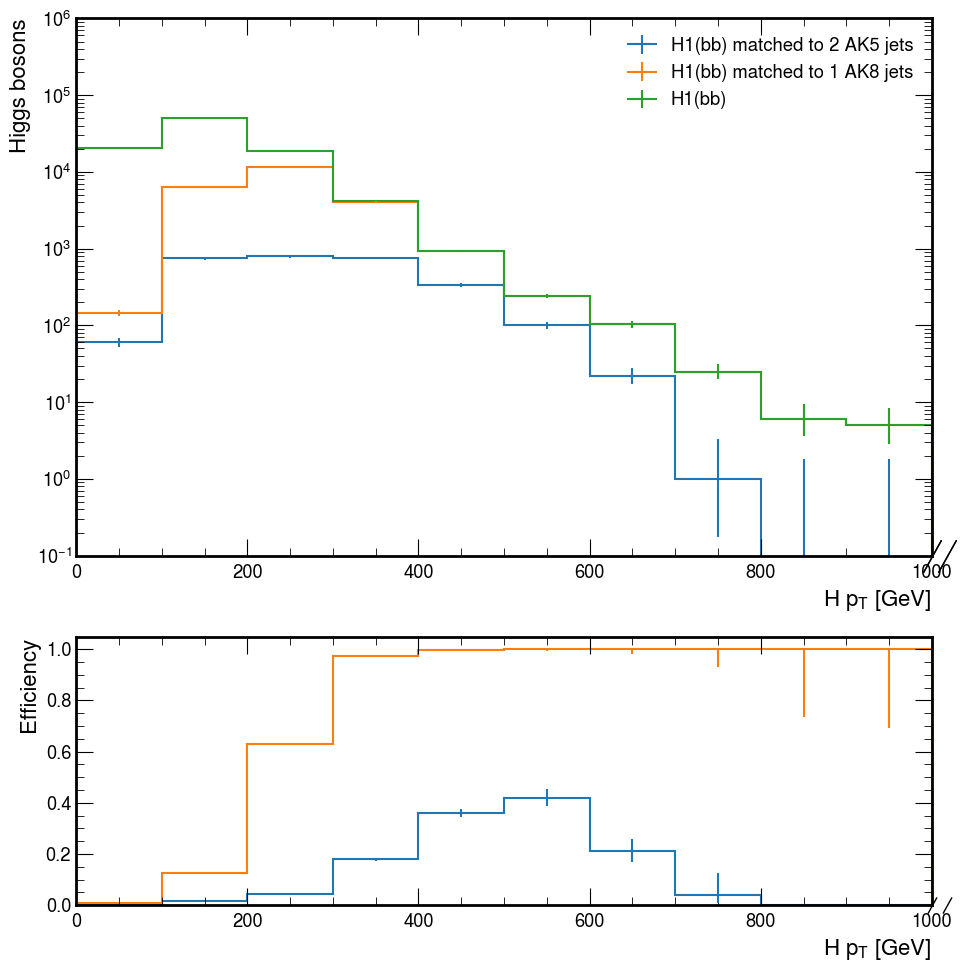

In [16]:
N_bin = 10

# fj matched 
events = pd.read_parquet(
    "../../../parquet/out_0.parquet"
    # "/eos/uscms/store/user/cmantill/bbbb/matching/Aug8/2022/GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG/parquet"
)
gen_higgs = make_vector(events, "GenHiggs")
higgs_pt = hist.Hist.new.Reg(N_bin, 0, 1000, name=r"H $p_T$ [GeV]").Double()
higgs_pt.fill(gen_higgs[:,0].pt)

fj_higgs_pt = hist.Hist.new.Reg(N_bin, 0, 1000, name=r"H $p_T$ [GeV]").Double()
fj_higgs_pt.fill(h1_mwfj.pt)

j_higgs_pt = hist.Hist.new.Reg(N_bin, 0, 1000, name=r"H $p_T$ [GeV]").Double()
j_higgs_pt.fill(h1_mwj.pt)

print(j_higgs_pt)
print(higgs_pt)
j_ratio = j_higgs_pt / higgs_pt
j_ratio_h1 = j_ratio
j_ratio_uncert = np.abs(clopper_pearson_interval(num=j_higgs_pt.values(), denom=higgs_pt.values()) - j_ratio)
fj_ratio = fj_higgs_pt / higgs_pt
fj_ratio_uncert = np.abs(clopper_pearson_interval(num=fj_higgs_pt.values(), denom=higgs_pt.values()) - fj_ratio)



fig, axs = plt.subplots(2, 1, height_ratios=[2, 1])
hep.histplot(j_higgs_pt, label="H1(bb) matched to 2 AK5 jets", ax=axs[0])
hep.histplot(fj_higgs_pt, label="H1(bb) matched to 1 AK8 jets", ax=axs[0])
hep.histplot(higgs_pt, label="H1(bb)", ax=axs[0])
axs[0].set_ylabel("Higgs bosons")
axs[0].set_xlim(0, 1000)
axs[0].set_ylim(1e-1, 1e6)
axs[0].semilogy()
axs[0].legend(loc="upper right")
hep.histplot(
    j_ratio,
    yerr=j_ratio_uncert,
    label="H(bb) matched to 2 AK5 jets",
    ax=axs[1],
)
hep.histplot(
    fj_ratio,
    yerr=fj_ratio_uncert,
    label="H(bb) matched to 1 AK8 jets",
    ax=axs[1],
)
axs[1].set_ylabel("Efficiency")
axs[1].set_xlim(0, 1000)
plt.tight_layout()
plt.savefig(f"{plot_dir}/matching_eff_H1.jpg")

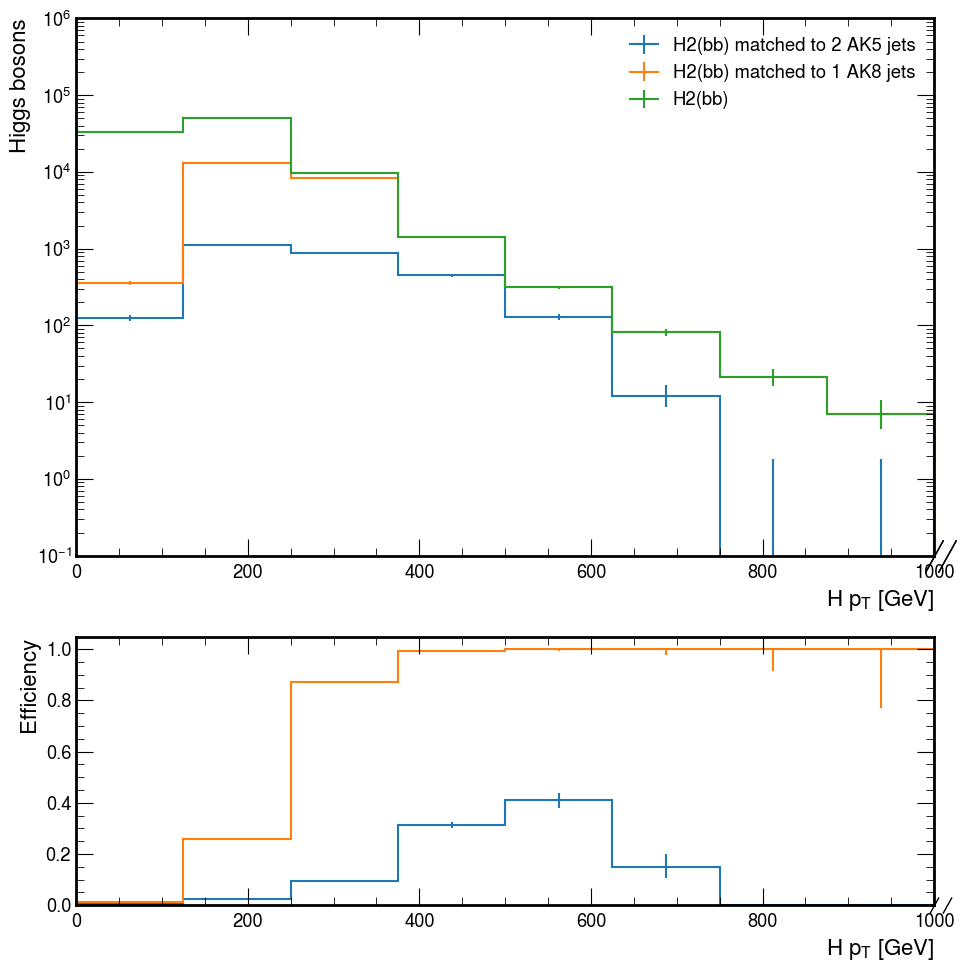

In [17]:
# fj matched 
N_bin = 8
events = pd.read_parquet(
    "../../../parquet/out_0.parquet"
    # "/eos/uscms/store/user/cmantill/bbbb/matching/Aug8/2022/GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG/parquet"
)
gen_higgs = make_vector(events, "GenHiggs")
higgs_pt = hist.Hist.new.Reg(N_bin, 0, 1000, name=r"H $p_T$ [GeV]").Double()
higgs_pt.fill(gen_higgs[:,1].pt)

fj_higgs_pt = hist.Hist.new.Reg(N_bin, 0, 1000, name=r"H $p_T$ [GeV]").Double()
fj_higgs_pt.fill(h2_mwfj.pt)

j_higgs_pt = hist.Hist.new.Reg(N_bin, 0, 1000, name=r"H $p_T$ [GeV]").Double()
j_higgs_pt.fill(h2_mwj.pt)


j_ratio = j_higgs_pt / higgs_pt
j_ratio_h2 = j_ratio
j_ratio_uncert = np.abs(clopper_pearson_interval(num=j_higgs_pt.values(), denom=higgs_pt.values()) - j_ratio)
fj_ratio = fj_higgs_pt / higgs_pt
fj_ratio_uncert = np.abs(clopper_pearson_interval(num=fj_higgs_pt.values(), denom=higgs_pt.values()) - fj_ratio)



fig, axs = plt.subplots(2, 1, height_ratios=[2, 1])
hep.histplot(j_higgs_pt, label="H2(bb) matched to 2 AK5 jets", ax=axs[0])
hep.histplot(fj_higgs_pt, label="H2(bb) matched to 1 AK8 jets", ax=axs[0])
hep.histplot(higgs_pt, label="H2(bb)", ax=axs[0])
axs[0].set_ylabel("Higgs bosons")
axs[0].set_xlim(0, 1000)
axs[0].set_ylim(1e-1, 1e6)
axs[0].semilogy()
axs[0].legend(loc="upper right")
hep.histplot(
    j_ratio,
    yerr=j_ratio_uncert,
    label="H(bb) matched to 2 AK5 jets",
    ax=axs[1],
)
hep.histplot(
    fj_ratio,
    yerr=fj_ratio_uncert,
    label="H(bb) matched to 1 AK8 jets",
    ax=axs[1],
)
axs[1].set_ylabel("Efficiency")
axs[1].set_xlim(0, 1000)
plt.tight_layout()
plt.savefig(f"{plot_dir}/matching_eff_H2.jpg")